In [105]:
from xmltodict import parse
from urllib.request import urlopen

import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import pandas as pd
import json
import yaml

import numpy as np

# Different Data Formats
## Comma Seperated Vectors (CSV)
Comma Seperated Vector fromat is probably simplest data format out there.

In [106]:
data = pd.read_csv('./data/Border_Crossing_Entry_Data.csv')

data

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Calais,Maine,115,US-Canada Border,Aug 2022,Trucks,6175,45.189,-67.275,POINT (-67.275381 45.188548)
1,Warroad,Minnesota,3423,US-Canada Border,May 2016,Buses,52,48.999,-95.377,POINT (-95.376555 48.999)
2,Laredo,Texas,2304,US-Mexico Border,Mar 2020,Trucks,203861,27.500,-99.507,POINT (-99.507412 27.499561)
3,Scobey,Montana,3309,US-Canada Border,Jul 2020,Trucks,81,49.000,-105.408,POINT (-105.407638 48.999527)
4,Madawaska,Maine,109,US-Canada Border,Oct 2019,Trucks,187,47.360,-68.329,POINT (-68.328684 47.360052)
...,...,...,...,...,...,...,...,...,...,...
376714,Otay Mesa,California,2506,US-Mexico Border,Jul 1996,Rail Containers Empty,513,32.550,-116.939,POINT (-116.938538 32.55033)
376715,Warroad,Minnesota,3423,US-Canada Border,Apr 1996,Truck Containers Loaded,1115,48.999,-95.377,POINT (-95.376555 48.999)
376716,Nighthawk,Washington,3011,US-Canada Border,Nov 1996,Buses,0,49.000,-119.671,POINT (-119.67103 49.000144)
376717,Madawaska,Maine,109,US-Canada Border,Sep 1996,Personal Vehicle Passengers,154139,47.360,-68.329,POINT (-68.328684 47.360052)


In [107]:
data.shape

(376719, 10)

In [108]:
data[['Date', 'Port Name', 'Measure', 'Value']]

,Date,Port Name,Measure,Value
0,Aug 2022,Calais,Trucks,6175
1,May 2016,Warroad,Buses,52
2,Mar 2020,Laredo,Trucks,203861
3,Jul 2020,Scobey,Trucks,81
4,Oct 2019,Madawaska,Trucks,187
...,...,...,...,...
376714,Jul 1996,Otay Mesa,Rail Containers Empty,513
376715,Apr 1996,Warroad,Truck Containers Loaded,1115
376716,Nov 1996,Nighthawk,Buses,0
376717,Sep 1996,Madawaska,Personal Vehicle Passengers,154139


In [109]:
data.iloc[:10, :4]

,Port Name,State,Port Code,Border
0,Calais,Maine,115,US-Canada Border
1,Warroad,Minnesota,3423,US-Canada Border
2,Laredo,Texas,2304,US-Mexico Border
3,Scobey,Montana,3309,US-Canada Border
4,Madawaska,Maine,109,US-Canada Border
5,Laredo,Texas,2304,US-Mexico Border
6,Del Rio,Texas,2302,US-Mexico Border
7,Sherwood,North Dakota,3414,US-Canada Border
8,Beecher Falls,Vermont,206,US-Canada Border
9,Roma,Texas,2310,US-Mexico Border


In [110]:
data[data['Value'] > 10000]

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
2,Laredo,Texas,2304,US-Mexico Border,Mar 2020,Trucks,203861,27.500,-99.507,POINT (-99.507412 27.499561)
12,Laredo,Texas,2304,US-Mexico Border,Nov 2021,Trucks,221978,27.500,-99.507,POINT (-99.507412 27.499561)
32,Laredo,Texas,2304,US-Mexico Border,Nov 2020,Trucks,212898,27.500,-99.507,POINT (-99.507412 27.499561)
67,Laredo,Texas,2304,US-Mexico Border,May 2018,Trucks,200723,27.500,-99.507,POINT (-99.507412 27.499561)
87,Laredo,Texas,2304,US-Mexico Border,Jun 2018,Trucks,193582,27.500,-99.507,POINT (-99.507412 27.499561)
...,...,...,...,...,...,...,...,...,...,...
376684,Naco,Arizona,2603,US-Mexico Border,Sep 1996,Personal Vehicles,23190,31.334,-109.948,POINT (-109.948413 31.334084)
376700,Alexandria Bay,New York,708,US-Canada Border,Feb 1996,Personal Vehicles,33477,44.347,-75.984,POINT (-75.983592 44.347229)
376701,Detroit,Michigan,3801,US-Canada Border,Sep 1996,Trucks,113465,42.332,-83.048,POINT (-83.047924 42.331685)
376711,Brownsville,Texas,2301,US-Mexico Border,Nov 1996,Personal Vehicle Passengers,1169385,25.952,-97.401,POINT (-97.40067 25.95155)


In [111]:
data['Date'][0]

'Aug 2022'

In [112]:
data['Date'] = pd.to_datetime(data['Date'])

data

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Calais,Maine,115,US-Canada Border,2022-08-01,Trucks,6175,45.189,-67.275,POINT (-67.275381 45.188548)
1,Warroad,Minnesota,3423,US-Canada Border,2016-05-01,Buses,52,48.999,-95.377,POINT (-95.376555 48.999)
2,Laredo,Texas,2304,US-Mexico Border,2020-03-01,Trucks,203861,27.500,-99.507,POINT (-99.507412 27.499561)
3,Scobey,Montana,3309,US-Canada Border,2020-07-01,Trucks,81,49.000,-105.408,POINT (-105.407638 48.999527)
4,Madawaska,Maine,109,US-Canada Border,2019-10-01,Trucks,187,47.360,-68.329,POINT (-68.328684 47.360052)
...,...,...,...,...,...,...,...,...,...,...
376714,Otay Mesa,California,2506,US-Mexico Border,1996-07-01,Rail Containers Empty,513,32.550,-116.939,POINT (-116.938538 32.55033)
376715,Warroad,Minnesota,3423,US-Canada Border,1996-04-01,Truck Containers Loaded,1115,48.999,-95.377,POINT (-95.376555 48.999)
376716,Nighthawk,Washington,3011,US-Canada Border,1996-11-01,Buses,0,49.000,-119.671,POINT (-119.67103 49.000144)
376717,Madawaska,Maine,109,US-Canada Border,1996-09-01,Personal Vehicle Passengers,154139,47.360,-68.329,POINT (-68.328684 47.360052)


In [113]:
res = data[(data['Date'] >= '2021-01-01') &
           (data['Date'] <= '2021-12-31') &
           (data['Measure'] == 'Trucks')][['Port Name', 'Value']].groupby('Port Name').sum()

res.sort_values('Value', ascending = False)

,Value
Port Name,
Laredo,2568471
Detroit,1398577
Otay Mesa,936628
Buffalo Niagara Falls,898320
Port Huron,850354
...,...
Whitlash,86
Port Angeles,33
Ferry,12


In [114]:
np.unique(data['Measure'])

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Loaded',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Loaded', 'Trucks'], dtype=object)

In [115]:
data[(data['Date'] == '2022-01') & (data['Measure'] == 'Trucks')][['State', 'Port Name']].groupby('State').count()

,Port Name
State,
Alaska,3
Arizona,5
California,3
Idaho,2
Maine,10
Michigan,3
Minnesota,7
Montana,10
New Mexico,2


### Excel Files
Microsoft excel files are structured data in a different format.

In [116]:
xls = pd.read_excel("https://data.ibb.gov.tr/dataset/321aa12d-a388-4c61-b915-522730b8230a/resource/f676e493-8995-4e50-90b3-5381da92627f/download/rayl-sistemler-hat-bazl-sefer-saylar.xlsx")

xls

,Tarih,M1,M2,M3,M4,M5,M6,M7,M9,T1,T4,T5,F1,T3,TF1,TF2
0,2017-01-01,21575,22479,16561,11762,NaN,7502,NaN,NaN,21497,12353,NaN,11950,NaN,NaN,NaN
1,2017-02-01,19488,20288,15012,10644,NaN,6776,NaN,NaN,19536,11188,NaN,10808,NaN,NaN,NaN
2,2017-03-01,21582,22846,16689,11820,NaN,7650,NaN,NaN,21714,12439,NaN,11978,NaN,NaN,NaN
3,2017-04-01,20870,21680,15967,11413,NaN,7260,NaN,NaN,20755,11949,NaN,11560,NaN,NaN,NaN
4,2017-05-01,21568,22588,16575,11784,NaN,7518,NaN,NaN,21612,12361,NaN,11604,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-12-01,21765,19130,8378,11692,11229.0,7590,9857.0,7275.0,23579,12753,7978.0,8432,2335.0,2524.0,5165.0
60,2022-01-01,21648,18938,8138,11448,11074.0,7605,10149.0,7203.0,22624,12333,7690.0,8438,2291.0,2171.0,4862.0
61,2022-02-01,19599,17164,7572,10508,10111.0,6854,9061.0,7544.0,21223,11459,7036.0,9296,2070.0,2057.0,4677.0
62,2022-03-01,21677,19084,8378,11755,11099.0,7580,10077.0,7273.0,23516,12734,7779.0,10136,2350.0,2944.0,5522.0


In [117]:
xls['Tarih'] = pd.to_datetime(xls['Tarih'])
xls = xls.fillna(0)
xls.index = xls['Tarih']

xls

,Tarih,M1,M2,M3,M4,M5,M6,M7,M9,T1,T4,T5,F1,T3,TF1,TF2
Tarih,,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,21575,22479,16561,11762,0.0,7502,0.0,0.0,21497,12353,0.0,11950,0.0,0.0,0.0
2017-02-01,2017-02-01,19488,20288,15012,10644,0.0,6776,0.0,0.0,19536,11188,0.0,10808,0.0,0.0,0.0
2017-03-01,2017-03-01,21582,22846,16689,11820,0.0,7650,0.0,0.0,21714,12439,0.0,11978,0.0,0.0,0.0
2017-04-01,2017-04-01,20870,21680,15967,11413,0.0,7260,0.0,0.0,20755,11949,0.0,11560,0.0,0.0,0.0
2017-05-01,2017-05-01,21568,22588,16575,11784,0.0,7518,0.0,0.0,21612,12361,0.0,11604,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2021-12-01,21765,19130,8378,11692,11229.0,7590,9857.0,7275.0,23579,12753,7978.0,8432,2335.0,2524.0,5165.0
2022-01-01,2022-01-01,21648,18938,8138,11448,11074.0,7605,10149.0,7203.0,22624,12333,7690.0,8438,2291.0,2171.0,4862.0
2022-02-01,2022-02-01,19599,17164,7572,10508,10111.0,6854,9061.0,7544.0,21223,11459,7036.0,9296,2070.0,2057.0,4677.0


In [118]:
tot21 = xls[(xls['Tarih'] >= '2021-01-01') & (xls['Tarih'] <= '2021-12-31')].sum(axis = 1) / 1000
tot20 = xls[(xls['Tarih']>='2020-01-01') & (xls['Tarih']<='2020-12-31')].sum(axis=1)/1000

/tmp/ipykernel_20943/1058306407.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tot21 = xls[(xls['Tarih'] >= '2021-01-01') & (xls['Tarih'] <= '2021-12-31')].sum(axis = 1) / 1000
/tmp/ipykernel_20943/1058306407.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tot20 = xls[(xls['Tarih']>='2020-01-01') & (xls['Tarih']<='2020-12-31')].sum(axis=1)/1000


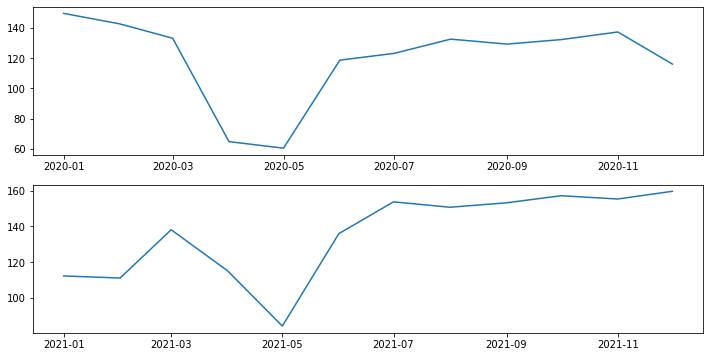

In [119]:
fig, ax = plt.subplots(2, figsize = (12, 6))
ax[0].plot(tot20)
ax[1].plot(tot21)

<AxesSubplot:xlabel='Tarih'>

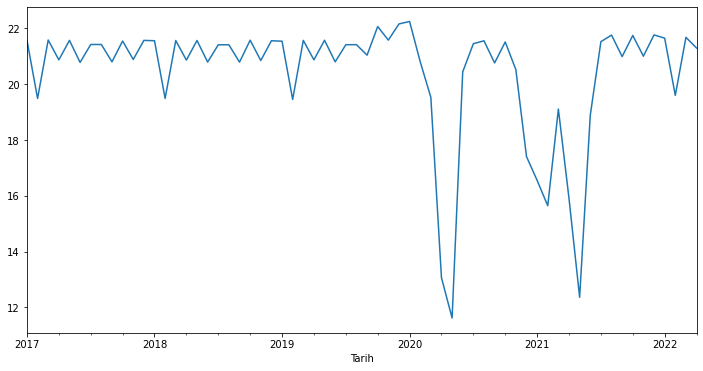

In [120]:
(xls['M1'] / 1000).plot(figsize = (12, 6))

### Javascript Object Notation (JSON)
JSON data format is more verbose but is also flexible than CSV format.

In [121]:
with open("./data/example1.json") as file:
    raw = json.load(file)

raw

[{'firstName': 'John',
  'lastName': 'Smith',
  'isAlive': True,
  'age': 27,
  'address': {'streetAddress': '21 2nd Street',
   'city': 'New York',
   'state': 'NY',
   'postalCode': '10021-3100'},
  'phoneNumbers': [{'type': 'home', 'number': '212 555-1234'},
   {'type': 'office', 'number': '646 555-4567'}],
  'children': [],
  'spouse': None},
 {'firstName': 'Jane',
  'lastName': 'Doe',
  'isAlive': True,
  'age': 29,
  'address': {'streetAddress': '431 Main Street',
   'city': 'San Fransisco',
   'state': 'CA',
   'postalCode': '50421'},
  'phoneNumbers': [{'type': 'home', 'number': '561 555-1234'},
   {'type': 'office', 'number': '555 555-4567'}],
  'children': [],
  'spouse': None}]

In [122]:
raw[0]['address']['city']

'New York'

We can import a JSON file directly as a python dictionary, or as an array of python dictionaries. Python dictionaries, or array of dictionaries, are much general since they allow any _hashable_ python data structure to be a key. 

In [123]:
xs = {(0, 1): 'a', -1: {0, 1, 2}, 'b': [0, 1, 2], True: False}

xs

{(0, 1): 'a', -1: {0, 1, 2}, 'b': [0, 1, 2], True: False}

However, a jSON file when parsed can only have strings as keys:

In [124]:
with open('./data/example2.json') as file:
    tmp = json.load(file)

tmp

{'(0,1)': 'a', '-1': '{0,1,2}', 'b': [0, 1, 2], 'True': 'False'}

In [125]:
with open('./data/example1.json') as file:
    df = pd.read_json(file)

df

,firstName,lastName,isAlive,age,address,phoneNumbers,children,spouse
0,John,Smith,True,27,"{'streetAddress': '21 2nd Street', 'city': 'Ne...","[{'type': 'home', 'number': '212 555-1234'}, {...",[],NaN
1,Jane,Doe,True,29,"{'streetAddress': '431 Main Street', 'city': '...","[{'type': 'home', 'number': '561 555-1234'}, {...",[],NaN


JSON data format is recursive. This means every named place could be another data that has the structure of a dictionary, or an array of dictionaries.

In [126]:
[[y['number'] for y in x['phoneNumbers']] for x in raw]

[['212 555-1234', '646 555-4567'], ['561 555-1234', '555 555-4567']]

In [127]:
raw[0]['phoneNumbers']

[{'type': 'home', 'number': '212 555-1234'},
 {'type': 'office', 'number': '646 555-4567'}]

In [128]:
raw[1]['address']

{'streetAddress': '431 Main Street',
 'city': 'San Fransisco',
 'state': 'CA',
 'postalCode': '50421'}

Most of the time, a JSON file is jusst another CSV file written in this format:

In [129]:
tmp = pd.read_csv('./data/iris.data',
                  header = None)

tmp.columns=['petal.length',
             'petal.width',
             'sepal.length',
             'sepal.width',
             'variety']
             
tmp

,petal.length,petal.width,sepal.length,sepal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [130]:
with open('./data/iris.json') as file:
    js = json.load(file)

js

[{'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5.1',
  'sepal.width': '3.5',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '4.9',
  'sepal.width': '3',
  'variety': 'Setosa'},
 {'petal.length': '1.3',
  'petal.width': '.2',
  'sepal.length': '4.7',
  'sepal.width': '3.2',
  'variety': 'Setosa'},
 {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '4.6',
  'sepal.width': '3.1',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.6',
  'variety': 'Setosa'},
 {'petal.length': '1.7',
  'petal.width': '.4',
  'sepal.length': '5.4',
  'sepal.width': '3.9',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.3',
  'sepal.length': '4.6',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.widt

In [131]:
df = pd.DataFrame(js)

df

,petal.length,petal.width,sepal.length,sepal.width,variety
0,1.4,.2,5.1,3.5,Setosa
1,1.4,.2,4.9,3,Setosa
2,1.3,.2,4.7,3.2,Setosa
3,1.5,.2,4.6,3.1,Setosa
4,1.4,.2,5,3.6,Setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3,Virginica
146,5,1.9,6.3,2.5,Virginica
147,5.2,2,6.5,3,Virginica
148,5.4,2.3,6.2,3.4,Virginica


In [132]:
json.loads(df.transpose().to_json())

{'0': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5.1',
  'sepal.width': '3.5',
  'variety': 'Setosa'},
 '1': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '4.9',
  'sepal.width': '3',
  'variety': 'Setosa'},
 '2': {'petal.length': '1.3',
  'petal.width': '.2',
  'sepal.length': '4.7',
  'sepal.width': '3.2',
  'variety': 'Setosa'},
 '3': {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '4.6',
  'sepal.width': '3.1',
  'variety': 'Setosa'},
 '4': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.6',
  'variety': 'Setosa'},
 '5': {'petal.length': '1.7',
  'petal.width': '.4',
  'sepal.length': '5.4',
  'sepal.width': '3.9',
  'variety': 'Setosa'},
 '6': {'petal.length': '1.4',
  'petal.width': '.3',
  'sepal.length': '4.6',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 '7': {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.4',
  'variety': 'Setosa'}

### Yet Another Markup Language (YAML)
Yet Another Markup Language is a very versatile data format used in variety of applications. It is not as widely used as JSON or XML.  

In [133]:
with open('./data/example3.yml') as file:
    yml = file.read()

yml

'---\nreceipts:\n  - receipt:     Oz-Ware Purchase Invoice\n    date:        2012-08-06\n    customer:\n        first_name:   Dorothy\n        family_name:  Gale\n\n    items:\n      - part_no:   A4786\n        descrip:   Water Bucket (Filled)\n        price:     1.47\n        quantity:  4\n\n      - part_no:   E1628\n        descrip:   High Heeled "Ruby" Slippers\n        size:      8\n        price:     133.7\n        quantity:  1\n\n    bill-to:  &id001\n        street: |\n            123 Tornado Alley\n            Suite 16\n        city:   East Centerville\n        state:  KS\n\n    ship-to:  *id001\n\n    specialDelivery:  >\n      Follow the Yellow Brick\n      Road to the Emerald City.\n      Pay no attention to the\n      man behind the curtain.\n  - receipt:    Oz-Ware Purchase Invoice\n    date:       2020-02-29\n    customer:\n        first_name:   Man\n        family_name:  Tin\n\n    items:\n      - part_no:  C9090\n        descrip:  Heart\n        price:    2.0\n        q

In [134]:
with open('./data/example3.yml') as file:
    yml = yaml.safe_load(file)
    
yml

{'receipts': [{'receipt': 'Oz-Ware Purchase Invoice',
   'date': datetime.date(2012, 8, 6),
   'customer': {'first_name': 'Dorothy', 'family_name': 'Gale'},
   'items': [{'part_no': 'A4786',
     'descrip': 'Water Bucket (Filled)',
     'price': 1.47,
     'quantity': 4},
    {'part_no': 'E1628',
     'descrip': 'High Heeled "Ruby" Slippers',
     'size': 8,
     'price': 133.7,
     'quantity': 1}],
   'bill-to': {'street': '123 Tornado Alley\nSuite 16\n',
    'city': 'East Centerville',
    'state': 'KS'},
   'ship-to': {'street': '123 Tornado Alley\nSuite 16\n',
    'city': 'East Centerville',
    'state': 'KS'},
   'specialDelivery': 'Follow the Yellow Brick Road to the Emerald City. Pay no attention to the man behind the curtain.\n'},
  {'receipt': 'Oz-Ware Purchase Invoice',
   'date': datetime.date(2020, 2, 29),
   'customer': {'first_name': 'Man', 'family_name': 'Tin'},
   'items': [{'part_no': 'C9090',
     'descrip': 'Heart',
     'price': 2.0,
     'quantity': 1}],
   'bill-

In [135]:
yml['receipts'][0]['customer']['first_name']

'Dorothy'

### Extensible Markup Language
XML is a complicated data and markup language. It basically assume the structure of the data/document is a tree.

In [136]:
xmlString = """
<library>
    <book>
       <year>1990</year>
       <title>XML Labeling</title>
       <publisher>Smart Publ.</publisher>
    </book>
    <magazine>
       <issue>1</issue>
       <title>Technology</title>
       <publisher>Ideal Publ.</publisher>
    </magazine>
</library>
"""

xml = ET.fromstring(xmlString)

xml

<Element 'library' at 0x7f9dd613a8e0>

In [137]:
{'library': 
  {'book': {'year': 1990, 'title': 'XML Labeling', 'publisher': 'Smart Publ.'},
   'magazine' : {'issue': 1, 'title': 'Tecnology', 'publisher': 'Ideal Publ'}}
}

{'library': {'book': {'year': 1990,
   'title': 'XML Labeling',
   'publisher': 'Smart Publ.'},
  'magazine': {'issue': 1, 'title': 'Tecnology', 'publisher': 'Ideal Publ'}}}

There are many variations of XML. Most famous and widely used variation of XML is Hypertext Markup Language (HTML). XML requires its own lecture (which I am not going to do!). The safest method to deal with XML via python is to convert it into a dictionary (or a hash-map) via xmltodict library.

In [138]:
with open('./data/DataCompact.xml') as url:
    raw = parse(url.read(),encoding='utf-8')
    
raw

{'message:CompactData': {'@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
  '@xmlns:common': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/common',
  '@xmlns:compact': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/compact',
  '@xmlns:OECD': 'http://oecd.stat.org/Data',
  '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message http://www.sdmx.org/docs/2_0/SDMXMessage.xsd http://oecd.stat.org/Data https://stats-1.oecd.org/RestSDMX/sdmx.ashx/GetSchema/EDU_GRAD_INST',
  '@xmlns:message': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
  'Header': {'ID': 'none',
   'Test': 'false',
   'Truncated': 'false',
   'Prepared': '2022-10-07T08:28:55',
   'Sender': {'@id': 'OECD',
    'Name': [{'@xml:lang': 'en',
      '#text': 'Organisation for Economic Co-operation and Development'},
     {'@xml:lang': 'fr',
      '#text': 'Organisation de coopération et de développem

In [139]:
raw['message:CompactData']

{'@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
 '@xmlns:common': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/common',
 '@xmlns:compact': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/compact',
 '@xmlns:OECD': 'http://oecd.stat.org/Data',
 '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
 '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message http://www.sdmx.org/docs/2_0/SDMXMessage.xsd http://oecd.stat.org/Data https://stats-1.oecd.org/RestSDMX/sdmx.ashx/GetSchema/EDU_GRAD_INST',
 '@xmlns:message': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
 'Header': {'ID': 'none',
  'Test': 'false',
  'Truncated': 'false',
  'Prepared': '2022-10-07T08:28:55',
  'Sender': {'@id': 'OECD',
   'Name': [{'@xml:lang': 'en',
     '#text': 'Organisation for Economic Co-operation and Development'},
    {'@xml:lang': 'fr',
     '#text': 'Organisation de coopération et de développement économiques'}]}},
 'OECD:DataSet': 